## drawing networks with matplotlib

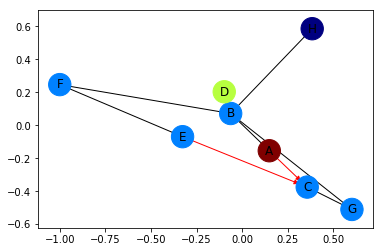

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]

# Specify the edges you want here
red_edges = [('A', 'C'), ('E', 'C')]
edge_colours = ['black' if not edge in red_edges else 'red'
                for edge in G.edges()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]

# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = values, node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)
plt.show()

In [10]:
import pandas as pd
import numpy as np

source = ['cleyra', 'cleyra', 'cleyra', 'godtiermeme']
target = ['capdocq', 'godtiermeme', 'tiagoofox', 'princess-kahlua']
reblog = ['1', '1', '0', '1']
like = ['1', '1', '1', '0']

d = {'source': source, 'target': target, 'reblog': reblog, 'like': like}

df = pd.DataFrame(d)
df

,like,reblog,source,target
0,1,1,cleyra,capdocq
1,1,1,cleyra,godtiermeme
2,1,0,cleyra,tiagoofox
3,0,1,godtiermeme,princess-kahlua


In [13]:
g = nx.from_pandas_edgelist(df, 'source', 'target', ['like', 'reblog'])

In [17]:
g['cleyra']['capdocq']

{'like': '1', 'reblog': '1'}

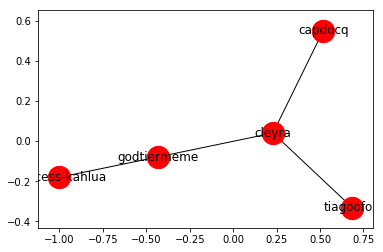

In [29]:
pos = nx.spring_layout(g)

nx.draw_networkx_nodes(g, pos, node_size = 500)

nx.draw_networkx_edges(g, pos)

nx.draw_networkx_labels(g, pos)

# nx.draw_networkx_edge_labels(g, pos, font_size=8)

plt.show()